In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load data
housing = fetch_california_housing()
X, y = pd.DataFrame(housing.data, columns=housing.feature_names), housing.target


preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Handle missing values (not needed here)
# X.fillna(X.mean(), inplace=True)

# Step 2: Scale features (Standard practice for tree consistency & grid search)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


Train CART Regression (Manual Parameters)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

reg_cart = DecisionTreeRegressor(
    criterion='squared_error',  # 'squared_error' for regression
    splitter='best',
    max_depth=6,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features=None,
    random_state=42
)
reg_cart.fit(X_train, y_train)
y_pred_cart = reg_cart.predict(X_test)

print("Manual CART Regression Metrics:")
print(f"R² Score: {r2_score(y_test, y_pred_cart):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_cart):.4f}")


Manual CART Regression Metrics:
R² Score: 0.6358
MSE: 0.4780


GridSearchCV for Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

grid_cart = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2'
)
grid_cart.fit(X_train, y_train)
best_reg = grid_cart.best_estimator_
y_pred_grid = best_reg.predict(X_test)

print("GridSearchCV CART Regression Metrics:")
print(f"Best Params: {grid_cart.best_params_}")
print(f"R² Score: {r2_score(y_test, y_pred_grid):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_grid):.4f}")


GridSearchCV CART Regression Metrics:
Best Params: {'max_depth': 8, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
R² Score: 0.6815
MSE: 0.4181


CART Regression with Pruning

In [ ]:
pruned_cart_reg = DecisionTreeRegressor(
    max_depth=4,
    min_impurity_decrease=0.001,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
pruned_cart_reg.fit(X_train, y_train)
y_pred_pruned_reg = pruned_cart_reg.predict(X_test)

print("Pruned CART Regression Metrics:")
print(f"R² Score: {r2_score(y_test, y_pred_pruned_reg):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_pruned_reg):.4f}")


Pruned CART Regression Metrics:
R² Score: 0.5677
MSE: 0.5674


Classification: CART with Custom Labels
To adapt this for classification, we’ll bucket house prices into categories.

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Classify prices (low, mid, high)
y_class = pd.cut(y, bins=[0, 1.5, 3.5, y.max()], labels=[0, 1, 2])
y_class = y_class.astype('int')  # For classifier

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_scaled, y_class, test_size=0.3, random_state=42)

cls_cart = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=6,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features=None,
    random_state=42
)
cls_cart.fit(X_train_cls, y_train_cls)
y_pred_cls = cls_cart.predict(X_test_cls)

print("Manual CART Classification:")
print(confusion_matrix(y_test_cls, y_pred_cls))
print(classification_report(y_test_cls, y_pred_cls))


Manual CART Classification:
[[1603  654    8]
 [ 461 2552  161]
 [  27  321  405]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74      2265
           1       0.72      0.80      0.76      3174
           2       0.71      0.54      0.61       753

    accuracy                           0.74      6192
   macro avg       0.73      0.68      0.70      6192
weighted avg       0.74      0.74      0.73      6192



GridSearchCV for Classification

In [ ]:
grid_cls = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)
grid_cls.fit(X_train_cls, y_train_cls)
best_cls = grid_cls.best_estimator_
y_pred_grid_cls = best_cls.predict(X_test_cls)

print("GridSearchCV CART Classification:")
print(f"Best Params: {grid_cls.best_params_}")
print(confusion_matrix(y_test_cls, y_pred_grid_cls))
print(classification_report(y_test_cls, y_pred_grid_cls))


GridSearchCV CART Classification:
Best Params: {'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
[[1741  523    1]
 [ 419 2627  128]
 [  13  381  359]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.78      2265
           1       0.74      0.83      0.78      3174
           2       0.74      0.48      0.58       753

    accuracy                           0.76      6192
   macro avg       0.76      0.69      0.72      6192
weighted avg       0.76      0.76      0.76      6192



CART Classification with Pruning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

pruned_cart_cls = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    min_impurity_decrease=0.001,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
pruned_cart_cls.fit(X_train_cls, y_train_cls)
y_pred_pruned_cls = pruned_cart_cls.predict(X_test_cls)

print("Pruned CART Classification Metrics:")
print(confusion_matrix(y_test_cls, y_pred_pruned_cls))
print(classification_report(y_test_cls, y_pred_pruned_cls))


Pruned CART Classification Metrics:
[[1561  702    2]
 [ 577 2553   44]
 [  37  455  261]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.70      2265
           1       0.69      0.80      0.74      3174
           2       0.85      0.35      0.49       753

    accuracy                           0.71      6192
   macro avg       0.75      0.61      0.65      6192
weighted avg       0.72      0.71      0.70      6192



### Comparing Classification Results

Classification Metrics Comparison:


,Accuracy,Precision,Recall,F1-Score
Manual Tuning,0.736434,0.737124,0.736434,0.733887
GridSearchCV,0.763404,0.763898,0.763404,0.759024
Pruning,0.706557,0.718657,0.706557,0.697299


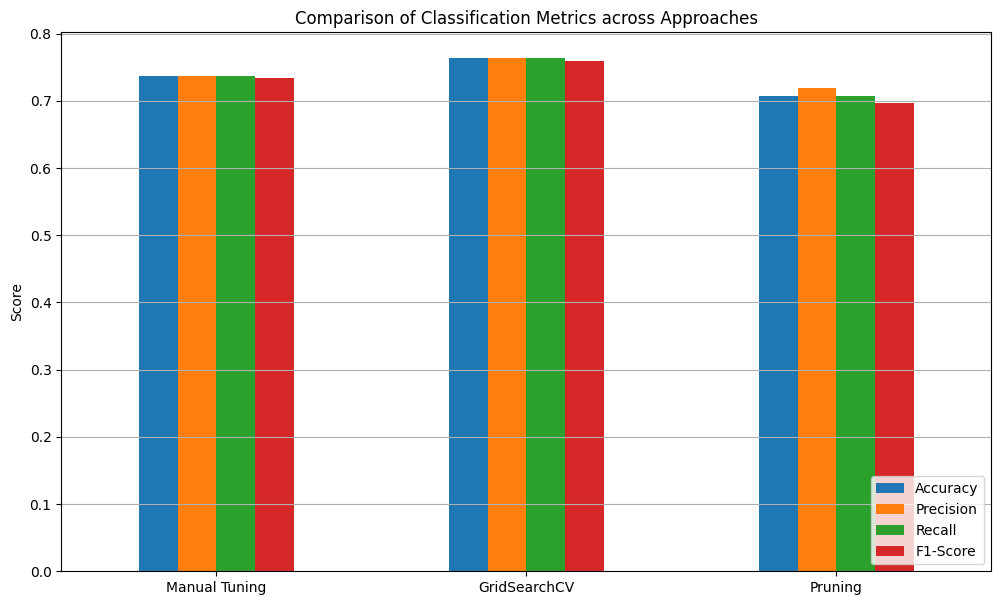

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for each approach
metrics = {
    'Manual Tuning': {
        'Accuracy': accuracy_score(y_test_cls, y_pred_cls),
        'Precision': precision_score(y_test_cls, y_pred_cls, average='weighted'),
        'Recall': recall_score(y_test_cls, y_pred_cls, average='weighted'),
        'F1-Score': f1_score(y_test_cls, y_pred_cls, average='weighted')
    },
    'GridSearchCV': {
        'Accuracy': accuracy_score(y_test_cls, y_pred_grid_cls),
        'Precision': precision_score(y_test_cls, y_pred_grid_cls, average='weighted'),
        'Recall': recall_score(y_test_cls, y_pred_grid_cls, average='weighted'),
        'F1-Score': f1_score(y_test_cls, y_pred_grid_cls, average='weighted')
    },
    'Pruning': {
        'Accuracy': accuracy_score(y_test_cls, y_pred_pruned_cls),
        'Precision': precision_score(y_test_cls, y_pred_pruned_cls, average='weighted'),
        'Recall': recall_score(y_test_cls, y_pred_pruned_cls, average='weighted'),
        'F1-Score': f1_score(y_test_cls, y_pred_pruned_cls, average='weighted')
    }
}

# Convert metrics to a DataFrame for easier plotting
metrics_df = pd.DataFrame(metrics).T

# Display the metrics
print("Classification Metrics Comparison:")
display(metrics_df)

# Visualize the metrics
metrics_df.plot(kind='bar', figsize=(12, 7))
plt.title('Comparison of Classification Metrics across Approaches')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.show()

### Comparing Regression Results

Regression Metrics Comparison:


,R² Score,MSE
Manual Tuning,0.635837,0.477978
GridSearchCV,0.681479,0.418072
Pruning,0.567693,0.567420


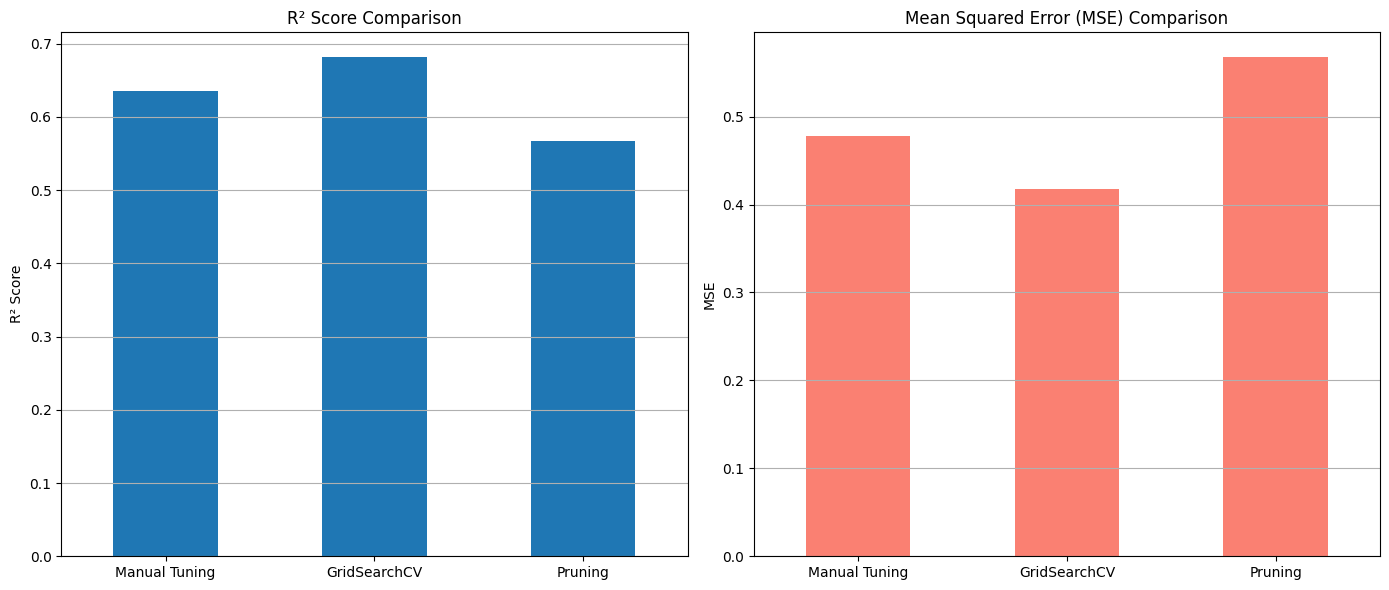

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Calculate metrics for each approach
regression_metrics = {
    'Manual Tuning': {
        'R² Score': r2_score(y_test, y_pred_cart),
        'MSE': mean_squared_error(y_test, y_pred_cart)
    },
    'GridSearchCV': {
        'R² Score': r2_score(y_test, y_pred_grid),
        'MSE': mean_squared_error(y_test, y_pred_grid)
    },
    'Pruning': {
        'R² Score': r2_score(y_test, y_pred_pruned_reg),
        'MSE': mean_squared_error(y_test, y_pred_pruned_reg)
    }
}

# Convert metrics to a DataFrame for easier plotting
regression_metrics_df = pd.DataFrame(regression_metrics).T

# Display the metrics
print("Regression Metrics Comparison:")
display(regression_metrics_df)

# Visualize the metrics
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

regression_metrics_df['R² Score'].plot(kind='bar', ax=axes[0])
axes[0].set_title('R² Score Comparison')
axes[0].set_ylabel('R² Score')
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(axis='y')

regression_metrics_df['MSE'].plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Mean Squared Error (MSE) Comparison')
axes[1].set_ylabel('MSE')
axes[1].tick_params(axis='x', rotation=0)
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()